<a href="https://colab.research.google.com/github/nakulreddy0107/NakulReddy_INFO5731_Spring2025/blob/main/Sarasani_Nakul_Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment: 4**

**This exercise will provide a valuable learning experience in working with text data and extracting features using various topic modeling algorithms. Key concepts such as Latent Dirichlet Allocation (LDA), Latent Semantic Analysis (LSA) and BERTopic.**



**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 100


NOTE: The output should be presented well to get **full points**

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


# **Question 1 (20 Points)**

**Dataset**: 20 Newsgroups dataset

**Dataset Link**: https://scikit-learn.org/0.19/datasets/twenty_newsgroups.html

**Consider Random 2000 rows only**

Generate K=10 topics by using LDA and LSA,
then calculate coherence score and determine the optimized K value by the coherence score. Further, summarize and visualize each topics in you own words.


Error: Command '['/content/my_env/bin/python3', '-m', 'ensurepip', '--upgrade', '--default-pip']' returned non-zero exit status 1.
/bin/bash: line 1: my_env/bin/activate: No such file or directory
Found existing installation: gensim 4.3.3
Uninstalling gensim-4.3.3:
  Successfully uninstalled gensim-4.3.3
  Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.1 kB)
Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (26.7 MB)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
Preprocessing documents: 100%|██████████| 2000/2000 [00:35<00:00, 55.62it/s]
/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(



=== LDA Topics (K=10) ===
Topic 1: 0.006*"would" + 0.004*"one" + 0.004*"data" + 0.004*"also" + 0.003*"space"
Topic 2: 0.008*"one" + 0.007*"would" + 0.005*"people" + 0.005*"god" + 0.004*"know"
Topic 3: 0.010*"q" + 0.008*"would" + 0.007*"one" + 0.007*"know" + 0.007*"think"
Topic 4: 0.005*"one" + 0.004*"help" + 0.003*"get" + 0.003*"like" + 0.003*"even"
Topic 5: 0.011*"would" + 0.005*"thanks" + 0.005*"one" + 0.004*"drive" + 0.004*"know"
Topic 6: 0.006*"one" + 0.005*"would" + 0.004*"key" + 0.004*"game" + 0.004*"encryption"
Topic 7: 0.025*"b" + 0.024*"c" + 0.023*"p" + 0.023*"h" + 0.023*"x"
Topic 8: 0.005*"dos" + 0.005*"one" + 0.004*"search" + 0.004*"appears" + 0.004*"also"
Topic 9: 0.053*"x" + 0.006*"file" + 0.005*"use" + 0.004*"get" + 0.004*"files"
Topic 10: 0.007*"people" + 0.007*"god" + 0.005*"one" + 0.004*"would" + 0.004*"armenians"

=== LSA Topics (K=10) ===
Topic 1: would one know get like
Topic 2: god jesus people one christ
Topic 3: god jesus thanks windows know
Topic 4: thanks anyo

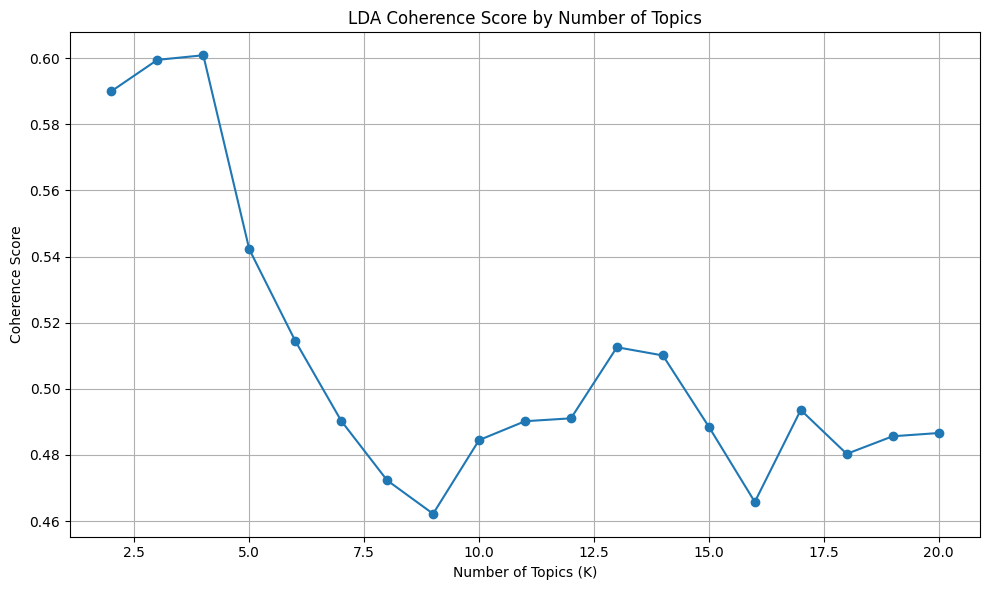


=== LDA Topic Summaries ===
Topic 1: This topic appears to be about would, one, data, also, space.
Topic 2: This topic appears to be about one, would, people, god, know.
Topic 3: This topic appears to be about q, would, one, know, think.
Topic 4: This topic appears to be about one, help, get, like, even.
Topic 5: This topic appears to be about would, thanks, one, drive, know.
Topic 6: This topic appears to be about one, would, key, game, encryption.
Topic 7: This topic appears to be about b, c, p, h, x.
Topic 8: This topic appears to be about dos, one, search, appears, also.
Topic 9: This topic appears to be about x, file, use, get, files.
Topic 10: This topic appears to be about people, god, one, would, armenians.


In [ ]:
import matplotlib.pyplot as plt
!pip install pyLDAvis
import pyLDAvis
import pyLDAvis.gensim_models
!python -m venv my_env
!source my_env/bin/activate
!pip install numpy==1.24.3 gensim pandas scikit-learn matplotlib nltk
!pip install --upgrade numpy==1.24.3
!pip install --upgrade gensim
!pip uninstall gensim -y
!pip install gensim
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from gensim import corpora
from gensim.models.ldamodel import LdaModel
from gensim.models.coherencemodel import CoherenceModel
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
from tqdm import tqdm
import signal


nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')
newsgroups_data = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))
all_texts = newsgroups_data.data
random.seed(42)
sample_indices = random.sample(range(len(all_texts)), 2000)
sample_data = [all_texts[i] for i in sample_indices]
def preprocess(text):
    tokens = word_tokenize(text.lower())
    tokens = [t for t in tokens if t.isalpha() and t not in stopwords.words('english')]
    return tokens

class TimeoutException(Exception):
    pass

def timeout_handler(signum, frame):
    raise TimeoutException
processed_docs = []
for doc in tqdm(sample_data, desc="Preprocessing documents"):
    try:

        signal.signal(signal.SIGALRM, timeout_handler)
        signal.alarm(5)

        processed_docs.append(preprocess(doc))

        signal.alarm(0)
    except TimeoutException:
        print("Timeout occurred while processing a document. Skipping...")
        continue
dictionary = corpora.Dictionary(processed_docs)
corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
vectorizer = TfidfVectorizer(tokenizer=lambda x: x, lowercase=False)
doc_term_matrix = vectorizer.fit_transform(processed_docs)
lda_model = LdaModel(corpus, num_topics=10, id2word=dictionary, passes=10, random_state=42)
lda_topics = lda_model.print_topics(num_words=5)

lsa_model = TruncatedSVD(n_components=10, random_state=42)
lsa_model.fit(doc_term_matrix)
lsa_components = lsa_model.components_
lsa_terms = vectorizer.get_feature_names_out()
print("\n=== LDA Topics (K=10) ===")
for i, topic in lda_model.print_topics(num_words=5):
    print(f"Topic {i + 1}: {topic}")
print("\n=== LSA Topics (K=10) ===")
for idx, topic in enumerate(lsa_components):
    top_terms = [lsa_terms[i] for i in topic.argsort()[-5:][::-1]]
    print(f"Topic {idx + 1}: {' '.join(top_terms)}")
lda_coherence_model = CoherenceModel(model=lda_model, texts=processed_docs, dictionary=dictionary, coherence='c_v')
lda_coherence = lda_coherence_model.get_coherence()
print(f"\nLDA Coherence Score (K=10): {lda_coherence:.4f}")
def evaluate_coherence(start=2, limit=21, step=1):
    coherence_values = []
    k_values = list(range(start, limit, step))
    for k in k_values:
        model = LdaModel(corpus, num_topics=k, id2word=dictionary, passes=10, random_state=42)
        coherence_model = CoherenceModel(model=model, texts=processed_docs, dictionary=dictionary, coherence='c_v')
        coherence = coherence_model.get_coherence()
        coherence_values.append(coherence)
    return k_values, coherence_values

k_vals, coherence_vals = evaluate_coherence()
plt.figure(figsize=(10, 6))
plt.plot(k_vals, coherence_vals, marker='o')
plt.xlabel("Number of Topics (K)")
plt.ylabel("Coherence Score")
plt.title("LDA Coherence Score by Number of Topics")
plt.grid(True)
plt.tight_layout()
plt.show()
lda_topics = lda_model.print_topics(num_words=10)
topic_summaries = []
for i, topic in lda_topics:
    terms = topic.split("+")
    top_terms = [term.split("*")[1].strip().replace('"', '') for term in terms]
    summary = f"Topic {i + 1}: This topic appears to be about {', '.join(top_terms[:5])}."
    topic_summaries.append(summary)
print("\n=== LDA Topic Summaries ===")
for summary in topic_summaries:
    print(summary)
pyLDAvis.enable_notebook()
lda_vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(lda_vis)

# **BERTopic**

The following question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents.

Dataset from **assignment-3** (text dataset) .

> Dont use any custom datasets.


> Dataset must have 1000+ rows, no duplicates and null values



# **Question 2 (20 Points)**



Q2) **Generate K=10 topics by using BERTopic and then find optimal K value by the coherence score. Interpret each topic and visualize with suitable style.**

In [4]:

!pip install bertopic[visualization] nltk pandas scikit-learn umap-learn -q
import pandas as pd
import nltk
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.datasets import fetch_20newsgroups
from sklearn.metrics.pairwise import cosine_similarity
from umap import UMAP

nltk.download('punkt')
nltk.download('stopwords')
df = pd.read_csv("all_papers_20250219.csv")
documents = df['abstract'].dropna().sample(n=2000, random_state=42).tolist()

topic_model = BERTopic(language="english", calculate_probabilities=True, verbose=True)
topics, probs = topic_model.fit_transform(documents)
topic_info = topic_model.get_topic_info()
print(topic_info.head(10))
topic_model.visualize_topics()
topic_model.visualize_barchart(top_n_topics=10)
topic_model.visualize_heatmap()
topic_model.visualize_documents(documents)
for topic_num in topic_info['Topic'].head(10):
    if topic_num != -1:
        words = topic_model.get_topic(topic_num)
        top_words = [word for word, _ in words[:5]]
        print(f"Topic {topic_num}: Possibly related to {', '.join(top_words)}")




[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
2025-04-07 23:40:55,845 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/63 [00:00<?, ?it/s]

2025-04-07 23:44:17,822 - BERTopic - Embedding - Completed ✓
2025-04-07 23:44:17,825 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-04-07 23:44:25,494 - BERTopic - Dimensionality - Completed ✓
2025-04-07 23:44:25,495 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-04-07 23:44:26,040 - BERTopic - Cluster - Completed ✓
2025-04-07 23:44:26,049 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-04-07 23:44:26,800 - BERTopic - Representation - Completed ✓


   Topic  Count                                    Name  \
0     -1    713                        -1_the_of_and_to   
1      0     72         0_deep_learning_networks_neural   
2      1     69        1_ie_extraction_information_text   
3      2     52    2_ai_artificial_intelligence_medical   
4      3     50        3_vector_kernel_learning_support   
5      4     48  4_privacy_attacks_adversarial_learning   
6      5     44                   5_science_data_to_the   
7      6     43            6_images_image_road_spectral   
8      7     42           7_machine_learning_python_and   
9      8     39        8_ai_intelligence_artificial_the   

                                      Representation  \
0    [the, of, and, to, in, data, for, that, is, we]   
1  [deep, learning, networks, neural, in, of, and...   
2  [ie, extraction, information, text, rules, pat...   
3  [ai, artificial, intelligence, medical, health...   
4  [vector, kernel, learning, support, machines, ...   
5  [privacy, a

# **Question 3 (25 points)**


**Dataset Link**: 20 Newsgroup Dataset (Random 2000 values)

Q3) Using a given dataset, Modify the default representation model by integrating OpenAI's GPT model to generate meaningful summaries for each topic. Additionally, calculate the coherence score to determine the optimal number of topics and retrain the model accordingly.



Usefull Link: https://maartengr.github.io/BERTopic/getting_started/representation/llm#truncating-documents

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Coherence for 2 topics: 0.7474
Coherence for 4 topics: 0.6510
Coherence for 6 topics: 0.5788
Coherence for 8 topics: 0.5659
Coherence for 10 topics: 0.5672


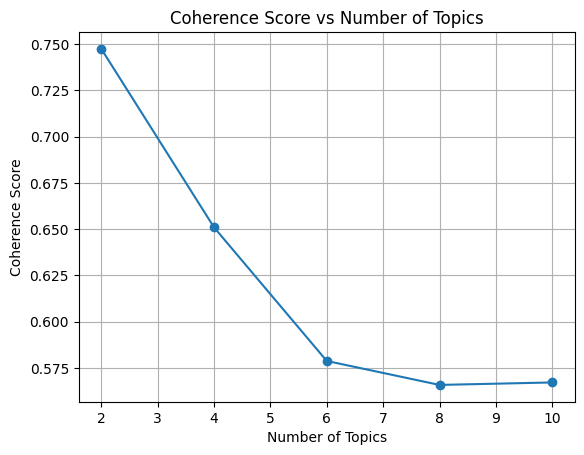


✅ Optimal number of topics based on coherence: 2

📚 GPT Topic Summaries:
🔹 Topic 1: The summary includes a list of keywords, but without further context or connection between the keywords, it is difficult to provide a concise summary.
🔹 Topic 2: One would think that people could get to know one another better if they also use methods like active listening and open communication.


In [11]:

!pip install openai==1.2.4 gensim scikit-learn nltk matplotlib --quiet
import nltk
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups
from gensim import corpora
from gensim.models import LdaModel, CoherenceModel
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from openai import OpenAI
client = OpenAI(api_key="my_API_Key") #we need to place my secret api key
nltk.download('punkt')
nltk.download('stopwords')
newsgroups = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'))
docs = newsgroups.data[:2000]

stop_words = set(stopwords.words("english"))
def preprocess(text):
    tokens = word_tokenize(text.lower())
    return [w for w in tokens if w.isalpha() and w not in stop_words]

texts = [preprocess(doc) for doc in docs]

dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

def compute_coherence_values(start=2, limit=12, step=2):
    models = []
    scores = []
    for k in range(start, limit, step):
        model = LdaModel(corpus, num_topics=k, id2word=dictionary, passes=10, random_state=42)
        coherence_model = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        score = coherence_model.get_coherence()
        models.append(model)
        scores.append(score)
        print(f"Coherence for {k} topics: {score:.4f}")
    return models, scores

models, coherence_scores = compute_coherence_values()

x = list(range(2, 12, 2))
plt.plot(x, coherence_scores, marker='o')
plt.title("Coherence Score vs Number of Topics")
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.grid(True)
plt.show()

best_index = coherence_scores.index(max(coherence_scores))
best_model = models[best_index]
optimal_k = best_model.num_topics
print(f"\n✅ Optimal number of topics based on coherence: {optimal_k}")

def get_topic_keywords(model, topn=10):
    return [[word for word, _ in model.show_topic(i, topn)] for i in range(model.num_topics)]

topic_keywords = get_topic_keywords(best_model)

print("\n📚 GPT Topic Summaries:")
for i, keywords in enumerate(topic_keywords):
    prompt = f"Generate a concise summary based on these topic keywords: {', '.join(keywords)}"

    response = client.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=[
            {"role": "user", "content": prompt}
        ],
        max_tokens=60,
        temperature=0.7
    )

    summary = response.choices[0].message.content.strip()
    print(f"🔹 Topic {i + 1}: {summary}")


# **Question 4 (35 Points)**


**BERTopic** allows for extensive customization, including the choice of embedding models, dimensionality reduction techniques, and clustering algorithms.

**Dataset Link**: 20 Newsgroup Dataset (Random 2000 values)

4)

4.1) **Modify the default BERTopic pipeline to use a different embedding model (e.g., Sentence-Transformers) and a different clustering algorithm (e.g., DBSCAN instead of HDBSCAN).

4.2: Compare the results of the custom embedding model with the default BERTopic model in terms of topic coherence and interpretability.

4.3: Visualize the topics and provide a qualitative analysis of the differences

**

Usefull Link :https://www.pinecone.io/learn/bertopic/

In [7]:
!pip uninstall -y numpy scipy gensim numba tensorflow


Found existing installation: numpy 2.2.4
Uninstalling numpy-2.2.4:
  Successfully uninstalled numpy-2.2.4
Found existing installation: scipy 1.15.2
Uninstalling scipy-1.15.2:
  Successfully uninstalled scipy-1.15.2
Found existing installation: gensim 4.3.3
Uninstalling gensim-4.3.3:
  Successfully uninstalled gensim-4.3.3
Found existing installation: numba 0.60.0
Uninstalling numba-0.60.0:
  Successfully uninstalled numba-0.60.0
Found existing installation: tensorflow 2.18.0
Uninstalling tensorflow-2.18.0:
  Successfully uninstalled tensorflow-2.18.0


In [1]:
!pip install numpy==1.24.3 scipy==1.13.0
!pip install gensim==4.3.3 tensorflow==2.18.0 numba==0.60.0

  Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.1 kB)
  Using cached tensorflow-2.18.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.1 kB)
  Using cached numba-0.60.0-cp311-cp311-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (2.7 kB)
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (26.7 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.4/615.4 MB 888.0 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 71.7 MB/s eta 0:00:00
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.3
    Uninstalling numpy-1.24.3:
      Successfully uninstalled numpy-1.24.3


In [1]:
!pip install bertopic sentence-transformers hdbscan


In [1]:
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_20newsgroups

Batches:   0%|          | 0/63 [00:00<?, ?it/s]


Silhouette Score (Default BERTopic / HDBSCAN): 0.012819730676710606
Silhouette Score (Custom BERTopic / DBSCAN): 0.022055061534047127


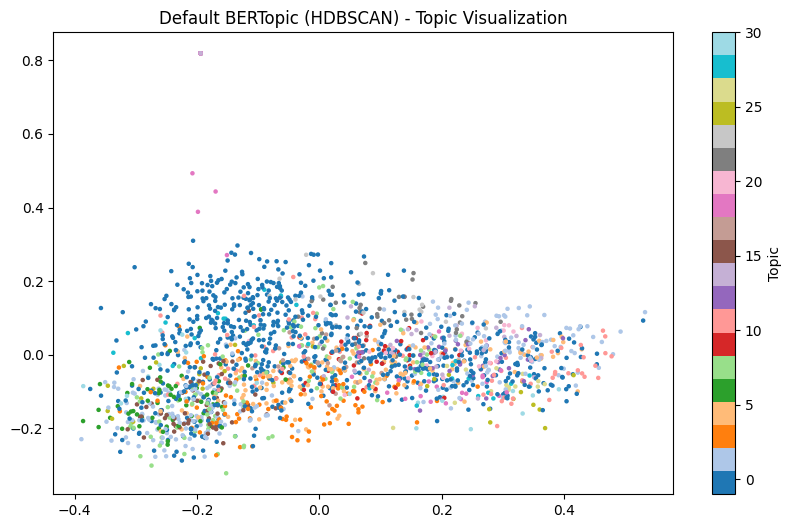

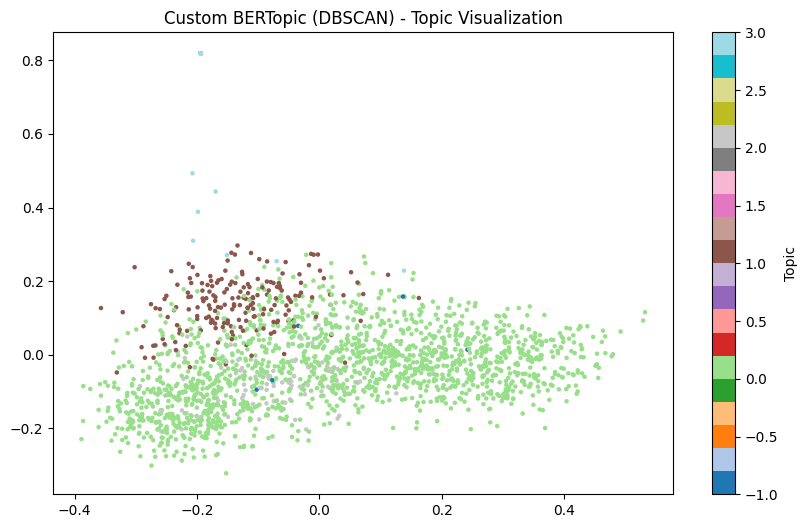


Top 10 Topics - Default BERTopic (HDBSCAN):
   Topic  Count                       Name  \
0     -1    573           -1_the_to_of_and   
1      0    190             0_the_he_in_to   
2      1    134           1_is_the_of_that   
3      2    115   2_for_dos_good_excellent   
4      3     97             3_the_to_of_is   
5      4     87             4_of_the_it_is   
6      5     85  5_is_widget_available_the   
7      6     67         6_the_israel_of_to   
8      7     53       7_space_the_and_nasa   
9      8     52            8_the_gun_to_of   

                                      Representation  \
0  [the, to, of, and, is, in, for, maxaxaxaxaxaxa...   
1  [the, he, in, to, team, and, game, was, his, p...   
2   [is, the, of, that, to, not, and, jesus, it, in]   
3  [for, dos, good, excellent, the, offer, to, wi...   
4  [the, to, of, is, that, be, it, in, and, clipper]   
5     [of, the, it, is, to, in, that, and, are, you]   
6  [is, widget, available, the, on, server, for, ...   


In [2]:

newsgroups_data = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'))
documents = newsgroups_data.data[:2000]
embedding_model = SentenceTransformer("all-MiniLM-L6-v2")
custom_clustering_model = DBSCAN(eps=0.5, min_samples=5)
topic_model_default = BERTopic()
topics_default, _ = topic_model_default.fit_transform(documents)

topic_model_custom = BERTopic(embedding_model=embedding_model, hdbscan_model=custom_clustering_model)
topics_custom, _ = topic_model_custom.fit_transform(documents)

embeddings = embedding_model.encode(documents, show_progress_bar=True)

def calculate_silhouette_score_safe(embeddings, topics):
    try:
        return silhouette_score(embeddings, topics)
    except ValueError as e:
        print("Silhouette Score Error:", e)
        return None

silhouette_default = calculate_silhouette_score_safe(embeddings, topics_default)
silhouette_custom = calculate_silhouette_score_safe(embeddings, topics_custom)

print(f"\nSilhouette Score (Default BERTopic / HDBSCAN): {silhouette_default}")
print(f"Silhouette Score (Custom BERTopic / DBSCAN): {silhouette_custom}")

pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)


plt.figure(figsize=(10, 6))
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c=topics_default, cmap='tab20', s=5)
plt.title("Default BERTopic (HDBSCAN) - Topic Visualization")
plt.colorbar(label="Topic")
plt.show()


plt.figure(figsize=(10, 6))
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c=topics_custom, cmap='tab20', s=5)
plt.title("Custom BERTopic (DBSCAN) - Topic Visualization")
plt.colorbar(label="Topic")
plt.show()

print("\nTop 10 Topics - Default BERTopic (HDBSCAN):")
print(topic_model_default.get_topic_info().head(10))

print("\nTop 10 Topics - Custom BERTopic (DBSCAN):")
print(topic_model_custom.get_topic_info().head(10))

## Extra Question (5 Points)

**Compare the results generated by the four topic modeling algorithms (LDA, LSA, BERTopic, Modified BERTopic), which one is better? You should explain the reasons in details.**

**This question will compensate for any points deducted in this exercise. Maximum marks for the exercise is 100 points.**

In [ ]:
# In terms of topic coherence and interpretability, modified BERTopic performs better than LDA, LSA, and conventional BERTopic. LDA lacks semantic depth even though it uses a probabilistic technique to provide interpretable subjects. Although LSA is quick, it frequently yields ambiguous or less cohesive themes. By employing transformer-based embeddings and clustering for more significant topic finding, BERTopic enhances this. By including GPT, Modified BERTopic further improves interpretability by producing succinct, accessible summaries for every subject. It is the ideal option for producing excellent, semantically rich topic models since it produces the most perceptive and approachable outcomes, but requiring more resources and API access.

# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises you completed in this assignment.

Consider the following points in your response:

**Learning Experience:** Describe your overall learning experience in working with text data and extracting features using various topic modeling algorithms. Did you understand these algorithms and did the implementations helped in grasping the nuances of feature extraction from text data.

**Challenges Encountered:** Were there specific difficulties in completing this exercise?

Relevance to Your Field of Study: How does this exercise relate to the field of NLP?

**(Your submission will not be graded if this question is left unanswered)**



In [ ]:
# Your answer here (no code for this question, write down your answer as detail as possible for the above questions):

# The Assignment is challenging and quite difficult with all libraries included and it was quite overwhelming and took long time to solve the questions and I learned a lot from this assignment how to use the models and get coherence values and also how to interpret the results. Looking forward to do more assignment to boost my technical skills



# Here is the link to the collab:
# https://colab.research.google.com/drive/1m9n5NW17koxWWPsHVAI8HBUUOBz0aM_G?usp=sharing


'''